In [72]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

import matplotlib.pyplot as plt
import bcolz
%matplotlib inline

# Any results you write to the current directory are saved as output.

In [3]:
df = pd.read_csv('data/train.csv')# .dropna() #There is a nan in here?


In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [16]:
df.shape

(404290, 6)

In [15]:
df[df['question2'].isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [17]:
df = df.dropna()
df.shape

(404288, 6)

In [18]:
corpus =pd.concat([df.question1,df.question2])
cv = CountVectorizer().fit(corpus)

In [36]:
len(cv.vocabulary_)

86153

In [19]:
duplicates = df.loc[df.is_duplicate==1,['question1','question2']]
nondupes = df.loc[df.is_duplicate==0,['question1','question2']]

In [41]:
# duplicates
a = cv.transform([nondupes.iloc[0].question1])
b = cv.transform([nondupes.iloc[0].question2])
cosine_similarity(a,b)

array([[ 0.94491118]])

In [52]:
non_dupes_csim = []

for j in range(nondupes.shape[0]):
    
    a = cv.transform([nondupes.iloc[j].question1])
    b = cv.transform([nondupes.iloc[j].question2])
    
    non_dupes_csim.append( cosine_similarity(a,b).ravel()[0])

In [53]:
duplicates_csim = []

for j in range(duplicates.shape[0]):
    
    a = cv.transform([duplicates.iloc[j].question1])
    b = cv.transform([duplicates.iloc[j].question2])
    
    duplicates_csim.append( cosine_similarity(a,b).ravel()[0])

In [56]:
len(non_dupes_csim), len(duplicates_csim)


(255025, 149263)

In [59]:
non_dupes_csim[0:3], duplicates_csim[0:3]

([0.94491118252306794, 0.58333333333333337, 0.36514837167011083],
 [0.60633906259083259, 0.33806170189140661, 0.53452248382484868])

(array([ 26841.,  25645.,  34536.,  36808.,  33035.,  28190.,  20232.,
         18822.,  17178.,  13381.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

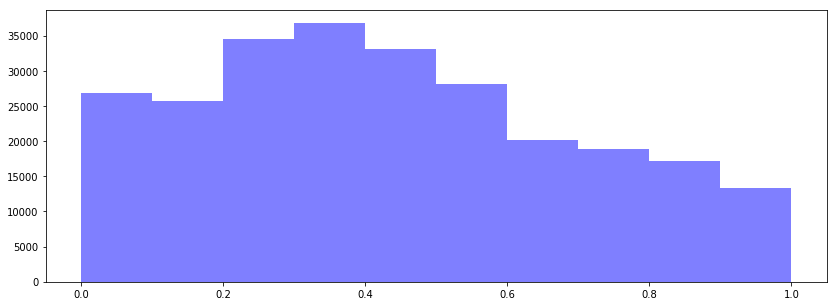

In [71]:
plt.figure(figsize=(14,5))
plt.hist(duplicates_csim, alpha = 0.5, color = 'r', normed = False, bins = np.linspace(0,1,11))
plt.hist(non_dupes_csim, alpha = 0.5, color = 'b', normed = False, bins = np.linspace(0,1,11))

In [73]:
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()


def load_array(fname):
    return bcolz.open(fname)[:]

In [75]:
save_array("data\\cache\\non_dupes_csim.dat",non_dupes_csim)

In [76]:
save_array("data\\cache\\duplicates_csim.dat",duplicates_csim)